1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


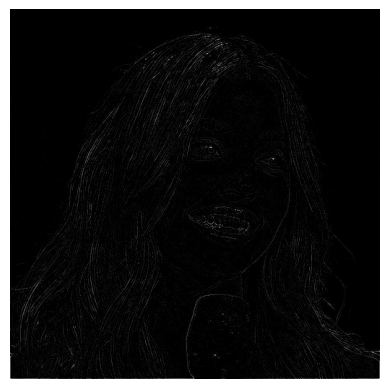

In [26]:
import tensorflow as tf
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt

img = tf.keras.utils.load_img('/home/dragos/Pictures/img.png', target_size=(512, 512))
img_array = tf.keras.utils.img_to_array(img)

img_array = img_array / 255.0

kernel_2d = np.array([[0, -1, 0],
                      [-1, 4, -1],
                      [0, -1, 0]], dtype='float32')
kernel = np.stack([kernel_2d] * 3, axis=-1) 
kernel = np.expand_dims(kernel, axis=-1)

model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=1, kernel_size=(3, 3), input_shape=(512, 512, 3), padding='same', use_bias=False, activation='relu'))

model.layers[0].set_weights([kernel])
model.layers[0].trainable = False

new_var = model.predict(tf.expand_dims(img_array, axis=0))

new_var = tf.squeeze(new_var, axis=0)
new_var = tf.squeeze(new_var, axis=2)

plt.imshow(new_var.numpy(), cmap='gray')
plt.axis('off')
plt.show()

output_path = os.path.join(os.path.dirname('/home/dragos/Pictures/img.png'), 'img_edges.png')
Image.fromarray((new_var.numpy() * 255).astype(np.uint8)).save(output_path)
